In [371]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import biosppy.signals.ecg as ecg
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from scipy import signal
from sklearn.preprocessing import MinMaxScaler

In [2]:
train = pd.read_csv("../data/X_train.csv").drop('id',axis=1)
test = pd.read_csv("../data/X_test.csv").drop('id',axis=1)
y = pd.read_csv("../data/y_train.csv").drop('id',axis=1).y.values

In [75]:
train.shape

(5117, 17813)

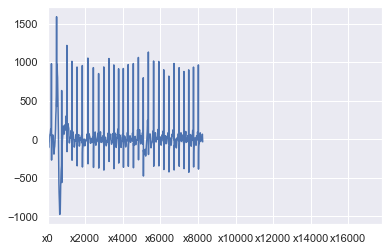

In [8]:
train.iloc[2,:].plot()

In [65]:
train = pd.concat([train,pd.DataFrame(y,columns=['y'])],axis=1)
train.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17804,x17805,x17806,x17807,x17808,x17809,x17810,x17811,x17812,y
0,215,210,200,184,159,131,107,87,61,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,56,53,50,47,42,38,34,30,26,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,-65,-63,-61,-59,-57,-55,-52,-49,-46,-44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,38,67,100,131,161,191,219,249,267,275,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,-291,-279,-261,-224,-148,-64,11,66,71,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [83]:
f = signal.resample(train.iloc[0,:].drop('y').dropna(), 128)

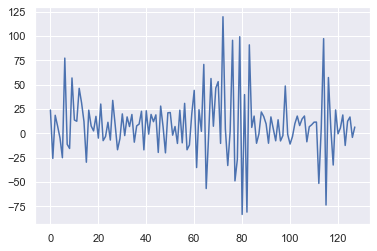

In [88]:
plt.plot(f)

In [508]:
def create_hbts_df(df):
    htbs_df = pd.DataFrame()
    sampling_rate = 300.0
#    new_sampling_rate = 128
#     before_ms = 0.235
#     after_ms = 0.390
    before_ms = 0.1
    after_ms = 0.167
    #print('Process {} started'.format(process_id))
    for index, row in df.iterrows():
        #print("row {}".format(index))
#         secs = len(row.drop('y').dropna())/sampling_rate # Number of seconds in signal X
#         samps = secs*new_sampling_rate     # Number of samples to downsample
#         sig =  signal.resample(row.drop('y').dropna(), round(samps))
        rpeaks = ecg.christov_segmenter(signal=row.drop('y').dropna().values, sampling_rate=sampling_rate)
        hbts = ecg.extract_heartbeats(signal=sig, rpeaks=rpeaks[0], sampling_rate=sampling_rate, 
                                      before=before_ms, after=after_ms)[0]
        htbs_df = pd.concat([htbs_df,
                             pd.DataFrame([np.append(x.reshape(-1, 1) 
                                 ,[index, row['y']]) for x in hbts])])
    return htbs_df
    #htbs_df.to_csv("{}_htbs.csv".format(process_id),index=False)
    #print('Process {} ended successfully'.format(process_id))
#StandardScaler().fit_transform(x.reshape(-1, 1))

In [506]:
train.shape

(5117, 17814)

In [509]:
hbts_df = create_hbts_df(train)

In [510]:
hbts_df.to_csv("hbts3.csv",index=False)

In [41]:
hbts_df = pd.read_csv("hbts.csv")

In [511]:
hbts_df.shape

(45296, 82)

In [512]:
hbts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,-8.410628,-3.817117,0.301565,6.526258,13.549684,27.281695,30.056087,11.639331,-11.315568,-11.246781,...,34.785789,19.385382,6.235923,5.264334,5.624829,3.645255,0.713773,16.567484,0.0,0.0
1,-56.641083,-76.774662,-90.229899,-51.068419,-8.555516,-6.887276,-5.725007,-6.682445,-13.549662,-24.901913,...,45.695046,24.861297,21.264150,16.033558,18.712596,13.141558,6.873434,-0.942977,0.0,0.0
2,-33.553340,-31.010812,-4.378226,16.369167,13.284984,2.381774,-5.093607,-5.195087,3.945590,11.948395,...,98.888053,102.191234,101.947259,85.886081,69.575530,50.029640,34.522201,-0.928110,0.0,0.0
3,42.366470,32.991940,16.983736,-5.558421,-7.465341,-4.324353,28.230558,58.822783,54.542876,5.907260,...,-48.288832,-23.633502,-13.725232,-1.391527,69.373025,128.625084,128.137427,135.357742,0.0,0.0
4,36.687244,37.779040,52.383634,22.561632,-41.214933,-61.344712,-50.893466,-28.398476,-22.335139,-27.567076,...,-79.919705,-62.090461,-44.805879,-33.111132,3.775127,89.441354,140.282970,160.700927,0.0,0.0


In [4]:
# c0 = np.where(y == 0)
# c1 = np.where(y == 1)
# c2 = np.where(y == 2)
# c3 = np.where(y == 3)

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
# train.iloc[c0].isna().sum().plot.area(ax=axes[0,0], title='C1', color='purple')
# train.iloc[c1].isna().sum().plot.area(ax=axes[0,1], title='C2', color='skyblue')
# train.iloc[c2].isna().sum().plot.area(ax=axes[1,0], title='C3', color='silver')
# train.iloc[c3].isna().sum().plot.area(ax=axes[1,1], title='C4')

In [513]:
hbts_df = hbts_df.reset_index(drop=True)

In [523]:
train_ = train[~train.index.isin(np.array([1474, 4999, 4940, 4752, 2292, 3871]))]
train_.shape

(5111, 17814)

In [524]:
x_train, x_test, y_train, y_test = train_test_split(train_.drop('y',axis=1), train_['y'], test_size = 0.20, stratify = train_['y'])

In [525]:
train_split = pd.DataFrame({'index':x_train.index, 'y': y_train})
train_split.to_csv("train_split.csv",index=False)
test_split = pd.DataFrame({'index':x_test.index, 'y': y_test})
test_split.to_csv("test_split.csv",index=False)

In [526]:
train_.shape

(5111, 17814)

In [517]:
hbts_df[80].nunique()

5111

In [228]:
train.index

RangeIndex(start=0, stop=5117, step=1)

In [522]:
np.array(set(train.index) - set(hbts_df[80].unique()))

array({1474, 4999, 4940, 4752, 2292, 3871}, dtype=object)

ReturnTuple(rpeaks=array([11]))


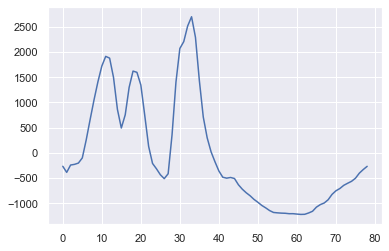

In [347]:
sampling_rate = 300.0
new_sampling_rate = 128
before_ms = 0.093
after_ms = 0.532
secs = len(train.iloc[3871,:].drop('y').dropna())/sampling_rate # Number of seconds in signal X
samps = secs*new_sampling_rate     # Number of samples to downsample
sig =  signal.resample(train.iloc[333,:].drop('y').dropna(), round(samps))
#plt.axvline(x=11,color='red')
rpeaks = ecg.christov_segmenter(signal=sig, sampling_rate=new_sampling_rate)
print(rpeaks)
hbts = ecg.extract_heartbeats(signal=sig, rpeaks=rpeaks[0], sampling_rate=new_sampling_rate, 
                                before=before_ms, after=after_ms)[0]
# print(hbts)
plt.plot(hbts[0])
# pd.DataFrame([np.append(x.reshape(-1, 1),[1474, int(train.iloc[1474,:]['y'])]) for x in hbts])

In [556]:
def Standardize(row):
    return pd.DataFrame(np.append(pd.DataFrame(MinMaxScaler().fit_transform(row.iloc[:80].values.reshape(-1, 1)))[0],np.array([row[80],row[81]])))[0]

In [557]:
hbts_df_ = hbts_df.apply(Standardize, axis=1)

In [558]:
hbts_df_.head()

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
0,0.223536,0.231614,0.238857,0.249804,0.262156,0.286305,0.291184,0.258796,0.218427,0.218548,...,0.299502,0.272419,0.249293,0.247585,0.248219,0.244737,0.239582,0.267463,0.0,0.0
1,0.231800,0.197937,0.175307,0.241172,0.312674,0.315480,0.317434,0.315824,0.304274,0.285181,...,0.403917,0.368877,0.362827,0.354030,0.358536,0.349166,0.338624,0.325477,0.0,0.0
2,0.272854,0.276965,0.320026,0.353572,0.348585,0.330956,0.318869,0.318705,0.333485,0.346424,...,0.486993,0.492333,0.491939,0.465970,0.439599,0.407996,0.382922,0.325604,0.0,0.0
3,0.330762,0.315698,0.289974,0.253752,0.250687,0.255735,0.308047,0.357205,0.350328,0.272176,...,0.185088,0.224707,0.240628,0.260447,0.374159,0.469370,0.468587,0.480189,0.0,0.0
4,0.308079,0.309964,0.335175,0.283695,0.173603,0.138855,0.156896,0.195727,0.206194,0.197162,...,0.106790,0.137567,0.167404,0.187592,0.251266,0.399144,0.486908,0.522154,0.0,0.0


In [559]:
x_indx, y_indx = 80, 81
x_train_hbts = hbts_df_[hbts_df_[x_indx].isin(x_train.index)]
y_train_hbts = x_train_hbts[y_indx]
x_train_hbts = x_train_hbts.drop(x_indx, axis=1).drop(y_indx, axis=1)
x_test_hbts = hbts_df_[hbts_df_[x_indx].isin(x_test.index)]
x_test_indx = x_test_hbts[x_indx]
y_test_hbts = x_test_hbts[y_indx]
x_test_hbts = x_test_hbts.drop(x_indx, axis=1).drop(y_indx, axis=1)
print(x_train_hbts.shape, x_test_hbts.shape, hbts_df_.shape)

(36229, 80) (9067, 80) (45296, 82)


In [560]:
y_train_hbts = y_train_hbts.astype('int')
y_test_hbts = y_test_hbts.astype('int')

In [497]:
cl_w = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_hbts),
                                                 y_train_hbts)

In [498]:
class_weight_dict = dict(enumerate(cl_w))
class_weight_dict

In [541]:
from keras.utils import to_categorical
y_categorical = to_categorical(y_train_hbts)

In [470]:
len(X)

141811

In [366]:
from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

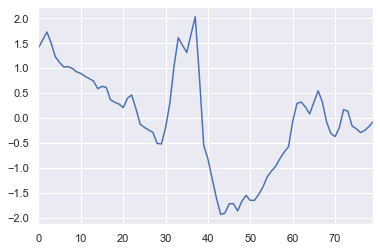

In [536]:
x_train_hbts.iloc[0,:].plot()

In [537]:
X = np.expand_dims(x_train_hbts, axis=2)

In [539]:
x_train_hbts.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
7,1.405390,1.568236,1.724439,1.503594,1.225471,1.112169,1.021304,1.028332,0.992514,0.925963,...,-0.375047,-0.194131,0.166732,0.134084,-0.160042,-0.219171,-0.293687,-0.250420,-0.171775,-0.072443
8,0.965281,0.769207,0.634081,0.739391,1.069275,1.107396,0.807819,0.570224,0.402450,0.325153,...,-1.057379,-0.921920,-0.641329,0.087637,0.581017,0.656235,0.726781,0.766997,0.810307,0.638337
9,-1.375460,-1.307668,-1.241643,-1.097226,-0.775795,-0.357572,0.090970,0.426341,0.636922,0.696804,...,1.098504,0.586820,0.118689,-0.273916,-0.670993,-1.300576,-1.395606,-1.465947,-1.547534,-1.538645
10,0.283698,0.109717,-0.237984,-0.563557,-0.699120,-0.557990,-0.118685,0.173940,0.438649,0.948159,...,-0.117706,-0.118881,-0.151311,-0.190010,-0.215485,-0.197278,-0.159347,-0.135455,-0.131857,-0.128696
11,-0.069520,-0.024759,-0.006882,0.008706,0.018265,0.015106,0.007604,-0.001204,-0.030622,-0.044395,...,0.404975,0.285615,0.210955,-0.084841,-0.411668,-0.419034,-0.258845,-0.191871,-0.336990,-0.563548


In [553]:
x_train_hbts.shape

(36229, 80)

In [562]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(x_train_hbts.iloc[0,:])
print(onehot_encoded)

ValueError: Expected 2D array, got 1D array instead:
array=[0.84227525 0.88329894 0.92264915 0.86701447 0.7969506  0.76840786
 0.74551747 0.74728772 0.73826457 0.72149926 0.71317492 0.69845241
 0.68711012 0.67425439 0.63591769 0.64803537 0.64258713 0.58005619
 0.56738051 0.55818567 0.54044639 0.58775801 0.60400826 0.53532663
 0.4567237  0.4402203  0.42718477 0.41523309 0.35914489 0.35653124
 0.43825539 0.56200657 0.75132358 0.89389837 0.85511306 0.81929881
 0.91076297 1.         0.68874723 0.348984   0.27951555 0.17973024
 0.08226016 0.         0.0067747  0.05355295 0.05476576 0.01769435
 0.06688255 0.09602885 0.07069592 0.07157414 0.10210438 0.14012924
 0.19069579 0.21983466 0.24452663 0.28289825 0.3157468  0.34250113
 0.47074728 0.56154852 0.568736   0.5431902  0.50839845 0.56816625
 0.62554381 0.56800383 0.46694806 0.40956635 0.39375232 0.43932829
 0.53023578 0.52201129 0.44791575 0.43302017 0.41424837 0.42514809
 0.44495993 0.46998345].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [554]:
TIME_PERIODS = x_train_hbts.shape[1]

model = models.Sequential()

model.add(layers.Reshape((TIME_PERIODS, 1), input_shape=(TIME_PERIODS,)))
model.add(layers.Conv1D(filters=5, kernel_size=11, strides=1, activation='relu', input_shape=(TIME_PERIODS, 1)))
#model.add(layers.BatchNormalization())
model.add(layers.Conv1D(filters=5, kernel_size=11, strides=1, activation='relu'))
model.add(layers.MaxPool1D(pool_size=2, strides = 2))
# model.add(layers.Conv1D(filters=160, kernel_size=10, activation='relu'))
#model.add(layers.Conv1D(filters=160, kernel_size=10, activation='relu'))
#model.add(layers.GlobalAveragePooling1D())
# model.add(layers.BatchNormalization())
# model.add(layers.Conv1D(filters=160, kernel_size=10, strides=1, activation='relu',kernel_initializer='glorot_normal', bias_initializer='zeros'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.fit(x_train_hbts.values, y_categorical, batch_size=200, epochs=50, validation_split=0.1)
print(model.summary())

Train on 32606 samples, validate on 3623 samples
Epoch 1/50
32606/32606 [==============================] - 8s 251us/sample - loss: 1.0282 - accuracy: 0.5774 - val_loss: 1.0227 - val_accuracy: 0.5915
Epoch 2/50
32606/32606 [==============================] - 8s 238us/sample - loss: 1.0172 - accuracy: 0.5777 - val_loss: 1.0186 - val_accuracy: 0.5915
Epoch 3/50
32606/32606 [==============================] - 8s 234us/sample - loss: 1.0151 - accuracy: 0.5777 - val_loss: 1.0192 - val_accuracy: 0.5915
Epoch 4/50
32606/32606 [==============================] - 8s 239us/sample - loss: 1.0148 - accuracy: 0.5777 - val_loss: 1.0229 - val_accuracy: 0.5915
Epoch 5/50
32606/32606 [==============================] - 7s 228us/sample - loss: 1.0143 - accuracy: 0.5777 - val_loss: 1.0238 - val_accuracy: 0.5915
Epoch 6/50
32606/32606 [==============================] - 8s 232us/sample - loss: 1.0142 - accuracy: 0.5777 - val_loss: 1.0200 - val_accuracy: 0.5915
Epoch 7/50
32606/32606 [===========================

KeyboardInterrupt: 

In [555]:
TIME_PERIODS = x_train_hbts.shape[1]

model = models.Sequential()

model.add(layers.Reshape((TIME_PERIODS, 1), input_shape=(TIME_PERIODS,)))
model.add(layers.Convolution1D(16, kernel_size=5, activation='relu', padding="valid", input_shape=(x_train_hbts.shape[1], 1)))
model.add(layers.Convolution1D(16, kernel_size=5, activation='relu', padding="valid"))
model.add(layers.MaxPool1D(pool_size=2))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Convolution1D(32, kernel_size=3, activation='relu', padding="valid"))
model.add(layers.Convolution1D(32, kernel_size=3, activation='relu', padding="valid"))
model.add(layers.MaxPool1D(pool_size=2))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Convolution1D(32, kernel_size=3, activation='relu', padding="valid"))
model.add(layers.Convolution1D(32, kernel_size=3, activation='relu', padding="valid"))
model.add(layers.MaxPool1D(pool_size=2))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Convolution1D(256, kernel_size=3, activation='relu', padding="valid"))
model.add(layers.Convolution1D(256, kernel_size=3, activation='relu', padding="valid"))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(64, activation='relu', name="dense_1"))
model.add(layers.Dense(64, activation='relu', name="dense_2"))
model.add(layers.Dense(4, activation='softmax', name="dense_3_mitbih"))

opt = optimizers.Adam(0.001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['acc'])

model.fit(x_train_hbts.values, y_train_hbts.values,  batch_size=200, epochs=50, validation_split=0.1)

print(model.summary())

Train on 32606 samples, validate on 3623 samples
Epoch 1/50
32606/32606 [==============================] - 7s 227us/sample - loss: 1.0303 - acc: 0.5775 - val_loss: 1.0232 - val_acc: 0.5915
Epoch 2/50
32606/32606 [==============================] - 6s 189us/sample - loss: 1.0149 - acc: 0.5777 - val_loss: 1.0171 - val_acc: 0.5915
Epoch 3/50
32606/32606 [==============================] - 6s 188us/sample - loss: 1.0144 - acc: 0.5777 - val_loss: 1.0190 - val_acc: 0.5915
Epoch 4/50
32606/32606 [==============================] - 6s 189us/sample - loss: 1.0137 - acc: 0.5777 - val_loss: 1.0220 - val_acc: 0.5915
Epoch 5/50
32606/32606 [==============================] - 6s 188us/sample - loss: 1.0137 - acc: 0.5777 - val_loss: 1.0198 - val_acc: 0.5915
Epoch 6/50
32606/32606 [==============================] - 6s 190us/sample - loss: 1.0131 - acc: 0.5777 - val_loss: 1.0225 - val_acc: 0.5915
Epoch 7/50
17400/32606 [===============>..............] - ETA: 2s - loss: 1.0139 - acc: 0.5798

KeyboardInterrupt: 

In [368]:
print(x_test_indx.nunique())
print(y_test.size)

1023
1023


In [477]:
X_ = np.expand_dims(x_test_hbts, axis=2)
pred = model.predict(X_)
y_pred = np.array([np.argmax(y) for y in pred])
test_pred_df = pd.DataFrame({'ind': x_test_indx, 'y':y_pred})
y_test_pred = test_pred_df.groupby('ind')['y'].value_counts().unstack().idxmax(axis=1)
F1 = f1_score(y_test, y_test_pred, average='micro')
F1

0.5347018572825024

In [193]:
y_test_pred

ind
1.0       0
32.0      0
34.0      2
36.0      0
39.0      0
         ..
5103.0    1
5104.0    0
5105.0    0
5108.0    0
5110.0    2
Length: 1022, dtype: int64